Problem 1 - Data Read, Write and Inspect:

• Dataset for the Task: "bank.csv"

In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
#1. Load the provided dataset and import in pandas DataFrame.
dataset_path=pd.read_csv("/content/drive/MyDrive/AI_sem-3/week02-workshop/Datasets/bank.csv")

In [ ]:
import pandas as pd
#2. Check info of the DataFrame and identify following:
#loading the dataset
file_path = "/content/drive/MyDrive/AI_sem-3/week02-workshop/Datasets/bank.csv"
data = pd.read_csv(file_path)

print("Dataset Info:")
data.info()

#(a) columns with dtypes=object
print("\nColumns with text or categorical data:")
text_columns_df = data.select_dtypes(include=['object'])
text_columns = list(text_columns_df.columns)
print(text_columns)

#(b) unique values of those columns
print("\nUnique values in these columns:")
for column_name, column_data in text_columns_df.items():
    print(f"{column_name}: {column_data.unique()}")

#(c) check for the total number of null values in each column.
print("\nMissing values in each column:")
print(data.isnull().sum())

#3. Drop all the columns with dtypes object and store in new DataFrame, also write the DataFrame in
#”.csv” with name ”banknumericdata.csv”
numeric_data = data.drop(columns=text_columns)
numeric_data.to_csv("numeric_bank_data.csv", index=False)  # Save without adding an extra index

#4. Read ”banknumericdata.csv” and Find the summary statistics.
print("\nSummary of the numeric data:")
numeric_data = pd.read_csv("numeric_bank_data.csv")
print(numeric_data.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB

Columns with text or categorical data:
['job', 'marital', 'education', 'default', 'h

Problem 2 - Data Imputations:

In [8]:
import pandas as pd
#Dataset for the Task: "medical_student.csv"
#1. Load the provided dataset and import in pandas DataFrame.
file_path = "/content/drive/MyDrive/AI_sem-3/week02-workshop/Datasets/medical_students_dataset.csv"
df = pd.read_csv(file_path)


#2. Check info of the DataFrame and identify column with missing (null) values.
missing_values = df.isnull().sum()
print("\nColumns with missing values:")
print(missing_values[missing_values > 0])

#For the column with missing values fill the values using various techniques we discussed above.
numerical = list(df.select_dtypes(include="number"))
df[numerical] = df[numerical].fillna(df[numerical].mean())

#replacing null of other object by mode
categorical = list(df.select_dtypes(include="object"))
for col in categorical:
    df[col] = df[col].fillna(df[col].mode()[0])

#verifying the changes
print("\nColumns with missing values after imputation:")
print(df.isnull().sum())

#4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

#droping duplicate rows
df.drop_duplicates(inplace=True)

#verify if duplicates are removed
print(f"Number of duplicate rows after removing: {df.duplicated().sum()}")



Columns with missing values:
Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64

Columns with missing values after imputation:
Student ID        0
Age               0
Gender            0
Height            0
Weight            0
Blood Type        0
BMI               0
Temperature       0
Heart Rate        0
Blood Pressure    0
Cholesterol       0
Diabetes          0
Smoking           0
dtype: int64

Number of duplicate rows: 12572
Number of duplicate rows after removing: 0


3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:
Dataset Used: "titanic.csv"

In [ ]:
# Problem - 1:
# Create a DataFrame that is subsetted for the columns ’Name’, ’Pclass’, ’Sex’, ’Age’, ’Fare’, and ’Survived’.
# Retain only those rows where ’Pclass’ is equal to 1, representing first-class passengers. What is the mean,
# median, maximum value, and minimum value of the ’Fare’ column?
import pandas as pd

file_path = "/content/drive/MyDrive/AI_sem-3/week02-workshop/Datasets/Titanic-Dataset.csv"

#loading the Titanic dataset
titanic = pd.read_csv(file_path)

#define the subset of columns
subset = ['Name', 'Pclass', 'Sex', 'Age', 'Fare', 'Survived']

#filter rows for first-class passengers
first_class_detail = titanic[subset].loc[titanic['Pclass'] == 1]

#display descriptive statistics for the 'Fare' column
first_class_detail['Fare'].describe()


,Fare
count,216.000000
mean,84.154687
std,78.380373
min,0.000000
25%,30.923950
50%,60.287500
75%,93.500000
max,512.329200


In [ ]:
#Problem - 2:
#How many null values are contained in the ’Age’ column in your subsetted DataFrame?
import pandas as pd

#print the number of null values in the 'Age' column
print("Number of null age values:", first_class_detail['Age'].isnull().sum())

#drop rows where 'Age' is null
first_class_detail = first_class_detail.dropna(subset=['Age'])

#display the first few rows after dropping nulls
first_class_detail.head()


Number of null age values: 30


,Name,Pclass,Sex,Age,Fare,Survived
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,71.2833,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,53.1000,1
6,"McCarthy, Mr. Timothy J",1,male,54.0,51.8625,0
11,"Bonnell, Miss. Elizabeth",1,female,58.0,26.5500,1
23,"Sloper, Mr. William Thompson",1,male,28.0,35.5000,1


Problem - 3:
The ’Embarked’ column in the Titanic dataset contains categorical data representing the ports of embarkation:

• ’C’ for Cherbourg
• ’Q’ for Queenstown
• ’S’ for Southampton

In [ ]:
#1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,
#’Embarked Q’, ’Embarked S’).

import pandas as pd
file_path = "/content/drive/MyDrive/AI_sem-3/week02-workshop/Datasets/Titanic-Dataset.csv"
titanic = pd.read_csv(file_path)

#one-hot encoding for the 'Embarked' column
embarked = pd.get_dummies(titanic['Embarked'], prefix='Embarked')

#2. Add these new columns to the original DataFrame.
titanic = pd.concat([titanic, embarked], axis=1)

#3. Drop the original ’Embarked’ column.
titanic.drop('Embarked', axis=1, inplace=True)

#4. Print the first few rows of the modified DataFrame to verify the changes.
print(titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True  


Problem - 4:
Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visualization to show how the survival distributions vary by gender.


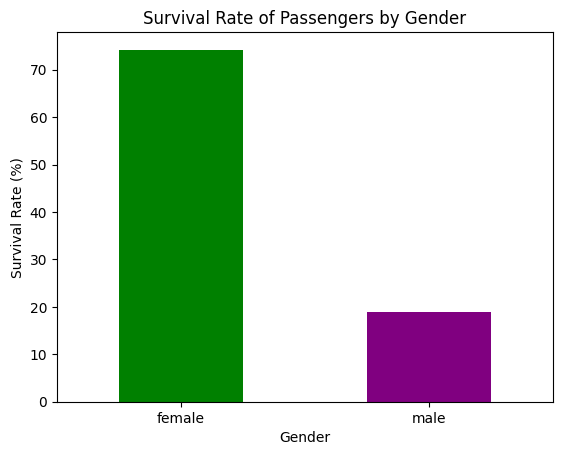

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

file_path = "/content/drive/MyDrive/AI_sem-3/week02-workshop/Datasets/Titanic-Dataset.csv"
titanic = pd.read_csv(file_path)

#subsetting the relevant columns for survival and gender
survived_gender = titanic[["Survived", "Sex"]]

#calculating the survival rate for each gender (multiplying by 100 to convert to percentage)
survival_rates = survived_gender.groupby(['Sex'])['Survived'].mean() * 100

#plotting the graph
survival_rates.plot(kind="bar", color=["green", "purple"])
plt.title("Survival Rate of Passengers by Gender")
plt.ylabel("Survival Rate (%)")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.show()

Problem - 5:
Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Embarked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).


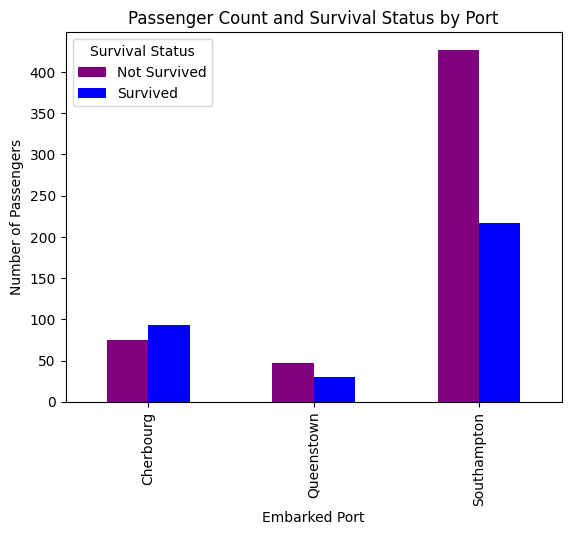

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

file_path = "/content/drive/MyDrive/AI_sem-3/week02-workshop/Datasets/Titanic-Dataset.csv"
titanic = pd.read_csv(file_path)

#perform one-hot encoding for the 'Embarked' column
embarked = pd.get_dummies(titanic['Embarked'], prefix='Embarked')

#add the one-hot encoded columns to the original DataFrame
titanic = pd.concat([titanic, embarked], axis=1)

#create a grouped DataFrame by "Survived" and sum over the embarked columns for survival count
embarked_survival = titanic.groupby('Survived')[['Embarked_C', 'Embarked_Q', 'Embarked_S']].sum().T

#plotting the bar chart for survival status across different embarkation points
embarked_survival.plot(kind="bar", stacked=False, color=["purple", "blue"])
plt.xticks(ticks=range(3), labels=["Cherbourg", "Queenstown", "Southampton"])
plt.title("Passenger Count and Survival Status by Port")
plt.xlabel("Embarked Port")
plt.ylabel("Number of Passengers")
plt.legend(["Not Survived", "Survived"], title="Survival Status")
plt.show()